# Исследование продаж интернет-магазина "Стримчик"

<div style="border:solid blue 2px; padding: 20px">

**Интернет магазин "Стримчик" продает игры по всему миру**
    
**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель проекта:** Выявить закономерности, определяющие успешность игры. Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

*Представлены данные за 2016 год*

**Ход исследования**
1. Загрузка и знакомство с данными
2. Предобработка данных (заполнение пропусков и удаление явных/неявных дубликатов)
3. Исследовательский анализ данных:
   - изчение продаж в разрезе платформ, жанров и географически регионов
   - изучение зависимостей продаж от оценок критиков и пользователей
4. Составление портрета пользователя по регионам (платформа, жанр, возраст)
5. Проверка статистических гипотез:
   - о равенстве средних оценок пользователей на платформах Xbox One и PC
   - о равенстве средних оценок пользователей игр жанров Action и Sports

</div>

<div style="border:solid orange 2px; padding: 20px">
    
#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

</div>

In [107]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

## Загрузка и знакомство с данными

In [108]:
# загрузка датасета
data = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [109]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [110]:
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [111]:
# знакомство с данными
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [112]:
# форматирование названий столбцов в формате snake_case
data.columns = data.columns.str.lower()

In [113]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [114]:
# размерность данных
data.shape

(16715, 11)

****
**Всего в таблице 16 715 записей**

**Какие проблемы обнаружены в данных?**
- в переменных Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутсвуют пропуски:
    * в таких переменных, как Name, Year_of_Release, Genre и Rating пропуски заменить не получится, так как переменные качественные (т.е. брать среднее или медиану не получится, а заменять на моду будет не совсем корректно, так как может исказить данные)
    * пропуски в количественных переменных Critic_Score, User_Score получится заменить на соответсвующие характеристики распределения (медиана или среднее) 
- некоректный тип данных у переменных:
    * Critic_Score float -> int
    * User_Score object -> float
- В колонке User_Score наиболее популярное значение tbd (to be determined), что значит, что рейтинг еще не определен. Поэтому такие значения можно заменить на 0
 
***

##  Предобработка данных

- корректировка типов данных перменных
- заполнение пропусков (если возможно)
- выявление и устранение явных дубликатов
- выявление и устранение неявных дубликатов 

### Замена пропусков в данных и установка корректного типа данных

Text(0, 0.5, 'Частота')

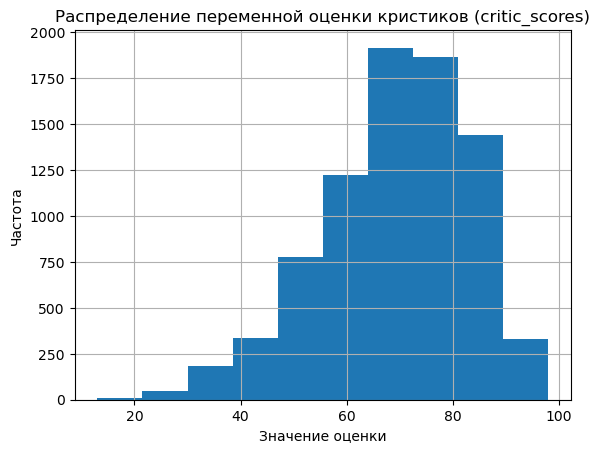

In [115]:
# оценка распределения переменной оценки критиков (critic_score)
data['critic_score'].hist()
plt.title('Распределение перeменной оценки кристиков (critic_scores)')
plt.xlabel('Значение оценки')
plt.ylabel('Частота')

In [116]:
data.loc[data['critic_score'].isna(),].count()

name               8576
platform           8578
year_of_release    8463
genre              8576
na_sales           8578
eu_sales           8578
jp_sales           8578
other_sales        8578
critic_score          0
user_score         1915
rating             1895
dtype: int64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [118]:
# корректировка типа данных в переменной critic_score
data.loc[data['critic_score'].notna()==True, 'critic_score']= data.loc[data['critic_score'].notna()==True, 'critic_score'].astype(int)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий</b> 

Аббревиатура в переменной user_score tbd расшифровывается как "to be determined", что говорит о том, что оценка пользователями еще не присвоена, что фактически означает, что оценки нет (она равна 0). Следовательно такие значения справедливо заменить на 0.
</div>

In [119]:
data.loc[data['user_score']=='tbd'] = 0

In [120]:
# изменение типа данных в переменной user_score
data.loc[data['user_score'].notna()==True, 'user_score'] = data.loc[data['user_score'].notna()==True, 'user_score'].astype(float)

Text(0, 0.5, 'Частота')

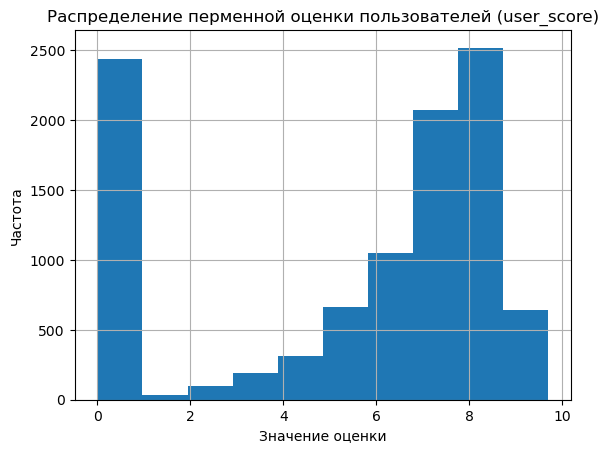

In [121]:
# изучение распределения переменной оценки критиков (user_score)
data['user_score'].hist()
plt.title('Распределение перменной оценки пользователей (user_score)')
plt.xlabel('Значение оценки')
plt.ylabel('Частота')

In [122]:
data.loc[data['user_score'].isna(),].count()

name               6699
platform           6701
year_of_release    6607
genre              6699
na_sales           6701
eu_sales           6701
jp_sales           6701
other_sales        6701
critic_score         38
user_score            0
rating               71
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16494 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     9479 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9999 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [124]:
# так как доля пропцщенных значений в столбце год выпуска (year_of_release) не превышает 5% можно их отбросить 
data = data.loc[data['year_of_release'].notna(),]

In [125]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [126]:
# также доля пропущенных значений не превышает 5%, следовательно пропущенными значениями можно пренебречь
data = data.loc[data['genre'].notna(),]

In [127]:
# проверка типов данных и ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16492 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16492 non-null  object 
 1   platform         16492 non-null  object 
 2   year_of_release  16492 non-null  int32  
 3   genre            16492 non-null  object 
 4   na_sales         16492 non-null  float64
 5   eu_sales         16492 non-null  float64
 6   jp_sales         16492 non-null  float64
 7   other_sales      16492 non-null  float64
 8   critic_score     9351 non-null   float64
 9   user_score       9887 non-null   object 
 10  rating           9866 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


### Устранение дубликатов (явных и неявных)

In [128]:
# количество дубликатов во всем датасете
data.duplicated().sum()

2423

In [129]:
# удаление полных дубликатов 
data = data.drop_duplicates()

In [130]:
# рассмотрение добликатов с идентичными значениями в трех полях (name, platform, year_of_release)
dup = data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]
dup

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [131]:
new = dup.loc[dup['platform']=='PS3','eu_sales'].sum()

In [132]:
data = data.drop([16230])

In [133]:
data.loc[(data['name']=='Madden NFL 13')&(data['platform']=='PS3')&(data['year_of_release']=='Sport')]['eu_sales'] = new

In [134]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [135]:
# проверка результата работы с дубликатами
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14068 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14068 non-null  object 
 2   year_of_release  14068 non-null  int32  
 3   genre            14068 non-null  object 
 4   na_sales         14068 non-null  float64
 5   eu_sales         14068 non-null  float64
 6   jp_sales         14068 non-null  float64
 7   other_sales      14068 non-null  float64
 8   critic_score     6927 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           7442 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.2+ MB


In [136]:
data.shape

(14068, 11)

In [137]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [138]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 0, 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [139]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 0,
       'Strategy'], dtype=object)

In [140]:
# типизация обозначения пропущенных значений
data.loc[(data['genre']==0)|(data['genre'].isna()), 'genre']='missing'

In [141]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 0, 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [142]:
# типизация обозначения пропущенных значений
data['rating']=data['rating'].fillna('missing')

### Суммарные продажи по регионам 

In [143]:
data['na_sales']=data['na_sales'].astype(float)

In [144]:
data['na_sales'].sum()

4043.1399999999994

In [145]:
region_sales = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum').to_frame().T
region_sales

,na_sales,eu_sales,jp_sales,other_sales
0,4043.14,2295.9,1284.03,744.84


In [146]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

***
**Вывод**

- были удалены строки с пропусками critic_score и user_score так как природа пропусков неизвестна до конца
- были выявлены и удалены неявные дубликаты, теперь таблица содержит **14 068** записи
- также были выявлены и устранены неявные дубликаты, они были связанны с пропущенными значениями и заменены на значение 'missing'

## Исследовательский анализ данных

In [147]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,missing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,missing,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,missing,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,missing,28.31


In [148]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,6927.000000,14068.000000
mean,2006.180409,0.287400,0.163200,0.091273,0.052946,70.236755,0.594819
std,18.006977,0.879667,0.544009,0.334487,0.202128,13.893471,1.673896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.060000
50%,2007.000000,0.080000,0.030000,0.000000,0.010000,72.000000,0.190000
75%,2011.000000,0.260000,0.130000,0.050000,0.040000,80.000000,0.540000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,82.540000


### Динамика количетва проданных игр по годам

In [149]:
# избавление от нереалистичных значений
data = data.loc[data['year_of_release']!=0]

In [150]:
# подсчет количества игр, выпущенных за каждый год
ax=data.groupby('year_of_release')['year_of_release'].count().to_frame()
ax=ax.rename(columns={'year_of_release':'count'}).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

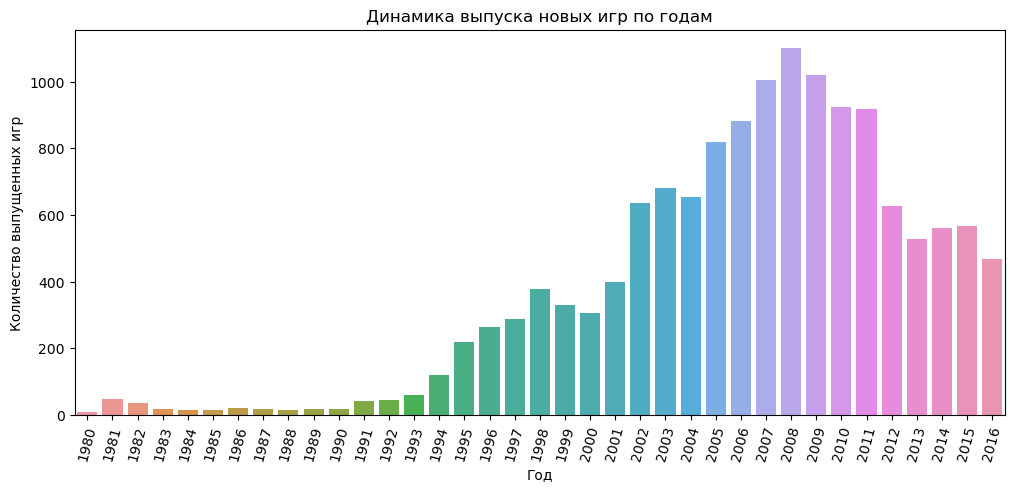

In [151]:
plt.figure(figsize=(12,5))
sns.barplot(x=ax['year_of_release'], y=ax['count'])
plt.title('Динамика выпуска новых игр по годам')
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество выпущенных игр', fontsize=10)
plt.xticks(rotation=75)

***
**Вывод**
- игры выпускались в период с 1980 по 2016 год
- больше всего игр продавалось в период с 2001 года, поэтому период для анализа стоит выбрать с 2001 по 2016 год

***

#### Продажи интернет-магазина по платформам 

In [152]:
# выбор периода, наиболее подходящего для проверки гипотез и построения прогноза в соответсвие с динамикой данных
ax=data.loc[data['year_of_release']>=2001.0,]

# подсчет суммарных продаж по платформам 
ax=ax.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ax['total_sales']=ax['na_sales']+ax['eu_sales']+ax['jp_sales']+ax['other_sales']
ax=ax.sort_values(by='total_sales', ascending=False).reset_index().head(5)

In [153]:
ax.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS2,529.57,301.75,128.20,176.76,1136.28
1,X360,585.84,266.74,12.26,83.90,948.74
2,PS3,383.80,324.87,79.04,133.37,921.08
3,Wii,412.77,241.29,67.85,70.00,791.91
4,DS,279.06,157.54,171.52,47.22,655.34


In [154]:
# изучение динамики продаж по платформам и годам 
ax=data.loc[data['platform'].isin(ax['platform'])&(data['year_of_release']>=2001.0)].groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
ax['total_sales']=ax['na_sales']+ax['eu_sales']+ax['jp_sales']+ax['other_sales']
ax.sort_values(by=['year_of_release', 'total_sales']).head()

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
10,PS2,2001,76.24,49.85,17.73,15.95,159.77
11,PS2,2002,93.07,62.57,21.60,20.83,198.07
12,PS2,2003,81.79,59.82,18.88,20.22,180.71
0,DS,2004,8.29,3.93,3.65,1.36,17.23
13,PS2,2004,95.45,54.97,19.17,39.51,209.10


In [155]:
# определение платформ, на которых продавались игры в период с 2001 года 
ax['platform'].unique()

array(['DS', 'PS2', 'PS3', 'Wii', 'X360'], dtype=object)

In [156]:
ax['total_sales']=ax['na_sales']+ax['eu_sales']+ax['jp_sales']+ax['other_sales']

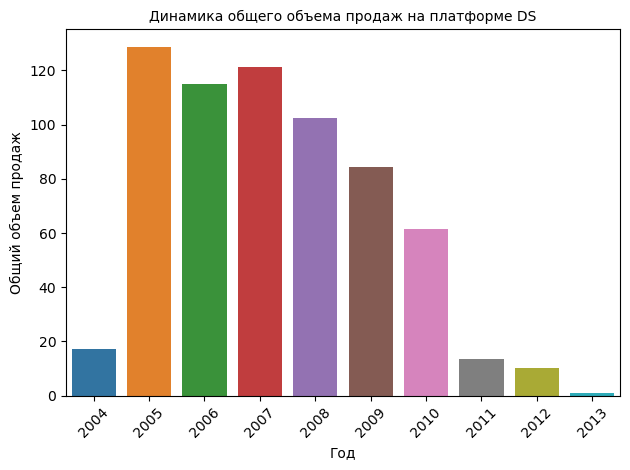

In [157]:
sns.barplot(x=ax.loc[ax['platform']=='DS','year_of_release'], y=ax.loc[ax['platform']=='DS', 'total_sales'])
plt.title('Динамика общего объема продаж на платформе DS', fontsize=10)
plt.xlabel('Год')
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()

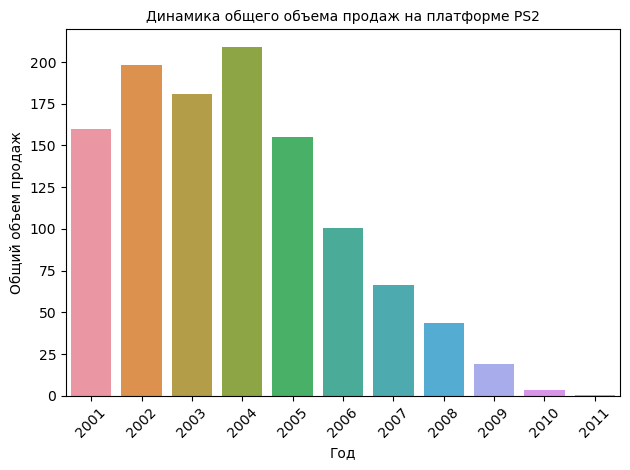

In [158]:
sns.barplot(x=ax.loc[ax['platform']=='PS2','year_of_release'], y=ax.loc[ax['platform']=='PS2', 'total_sales'])
plt.title('Динамика общего объема продаж на платформе PS2', fontsize=10)
plt.xlabel('Год')
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

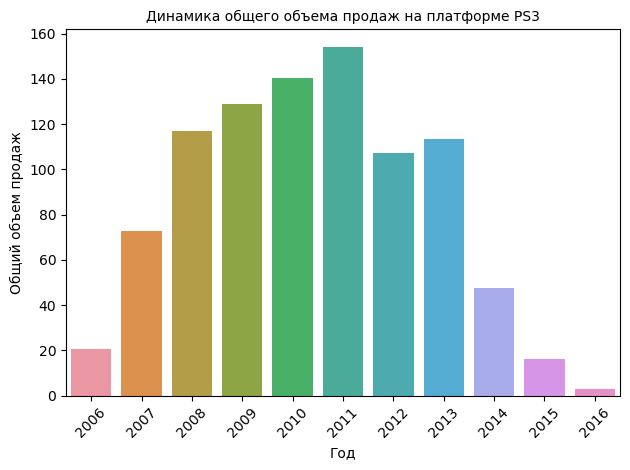

In [159]:
sns.barplot(x=ax.loc[ax['platform']=='PS3','year_of_release'], y=ax.loc[ax['platform']=='PS3', 'total_sales'])
plt.title('Динамика общего объема продаж на платформе PS3', fontsize=10)
plt.xlabel('Год')
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

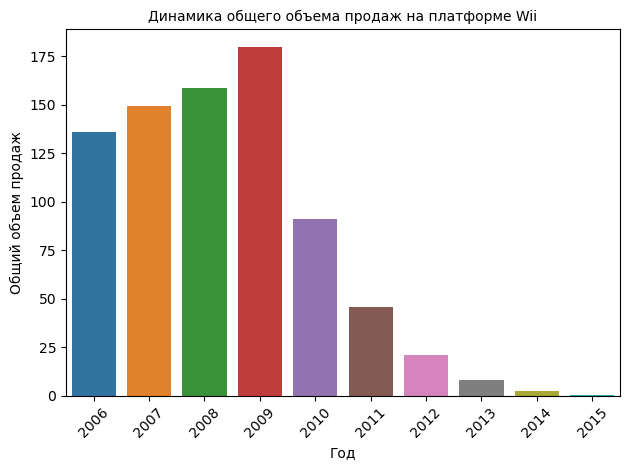

In [160]:
sns.barplot(x=ax.loc[ax['platform']=='Wii','year_of_release'], y=ax.loc[ax['platform']=='Wii', 'total_sales'])
plt.title('Динамика общего объема продаж на платформе Wii', fontsize=10)
plt.xlabel('Год')
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

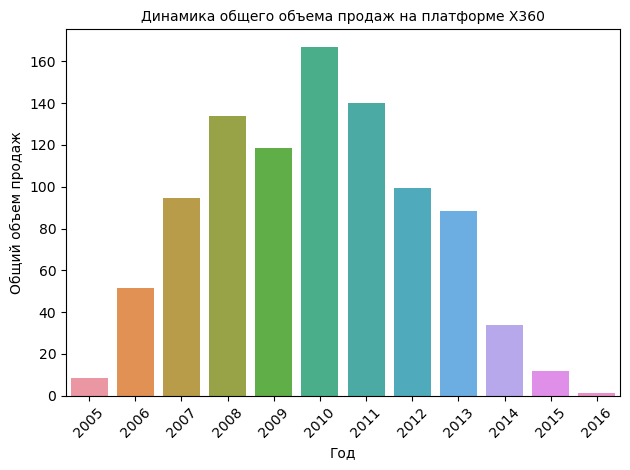

In [161]:
sns.barplot(x=ax.loc[ax['platform']=='X360','year_of_release'], y=ax.loc[ax['platform']=='X360', 'total_sales'])
plt.title('Динамика общего объема продаж на платформе X360', fontsize=10)
plt.xlabel('Год')
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

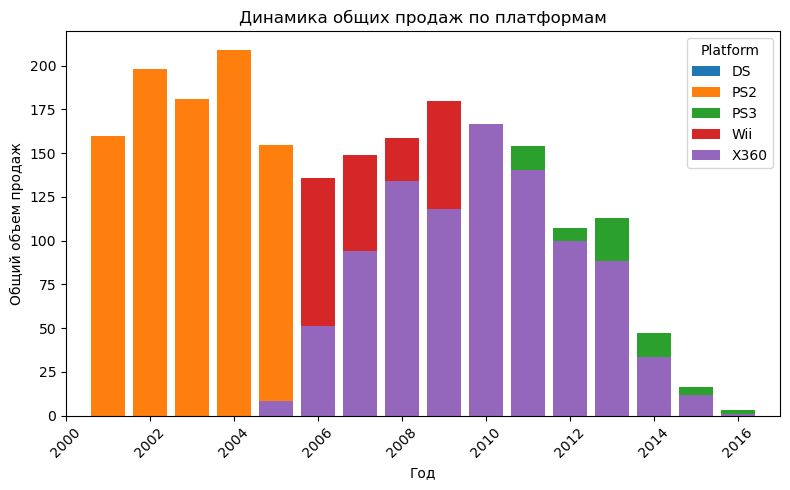

In [162]:
figure = plt.figure(figsize=(8, 5))

# ax1 = figure.add_subplot(2, 2, 1)
# ax1.bar(x=ax.loc[ax['platform']=='PS','year_of_release'], height=ax.loc[ax['platform']=='PS', 'total_sales'])
# ax2 = figure.add_subplot(2, 2, 2)
# ax2.bar(x=ax.loc[ax['platform']=='PS2','year_of_release'], height=ax.loc[ax['platform']=='PS2', 'total_sales'])
# ax3 = figure.add_subplot(223)
# ax3.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'total_sales'])
ax1 = figure.add_subplot()
ax1.bar(x=ax.loc[ax['platform']=='DS','year_of_release'], height=ax.loc[ax['platform']=='DS', 'total_sales'], label='DS')
ax1.bar(x=ax.loc[ax['platform']=='PS2','year_of_release'], height=ax.loc[ax['platform']=='PS2', 'total_sales'], label='PS2')
ax1.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'total_sales'], label='PS3')
ax1.bar(x=ax.loc[ax['platform']=='Wii','year_of_release'], height=ax.loc[ax['platform']=='Wii', 'total_sales'], label='Wii')
ax1.bar(x=ax.loc[ax['platform']=='X360','year_of_release'], height=ax.loc[ax['platform']=='X360', 'total_sales'], label='X360')

ax1.legend(title='Platform')
plt.title('Динамика общих продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Общий объем продаж')
plt.xticks(rotation=45)
plt.xlim(2000,2017)
plt.tight_layout()

***
**Вывод по динамике продаж по платформам**
- в период с 2001 по 2016 год платформы с наибольшим количеством продаж DS, PS2, PS3, Wii, X360
- платформы появляются и исчезают в периоде 5 лет, следовательно наиболее **актуальный период для анализа с 2012-2016**

***

#### Анализ продаж за период 2012-2016

In [163]:
# формирование выборки с актуальными для анализа данными в соответсвие с жизненным циклом платформы
data = data.loc[data['year_of_release']>=2012,]

In [164]:
# подсчет продаж по платформам и годам 
ax = data.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
ax['total_sales']=ax['na_sales']+ax['eu_sales']+ax['jp_sales']+ax['other_sales']

In [165]:
ax['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'], dtype=object)

In [166]:
ax[ax['year_of_release']==2016].sort_values(by=['year_of_release', 'total_sales'], ascending=[True,False])

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
20,PS4,2016,21.40,31.78,5.74,10.23,69.15
47,XOne,2016,14.09,9.50,0.01,2.22,25.82
4,3DS,2016,4.13,2.31,8.02,0.64,15.10
11,PC,2016,1.36,3.50,0.00,0.36,5.22
38,WiiU,2016,1.98,1.33,0.67,0.32,4.30
29,PSV,2016,0.15,0.38,3.56,0.15,4.24
16,PS3,2016,0.57,1.01,1.28,0.30,3.16
43,X360,2016,0.56,0.56,0.00,0.10,1.22


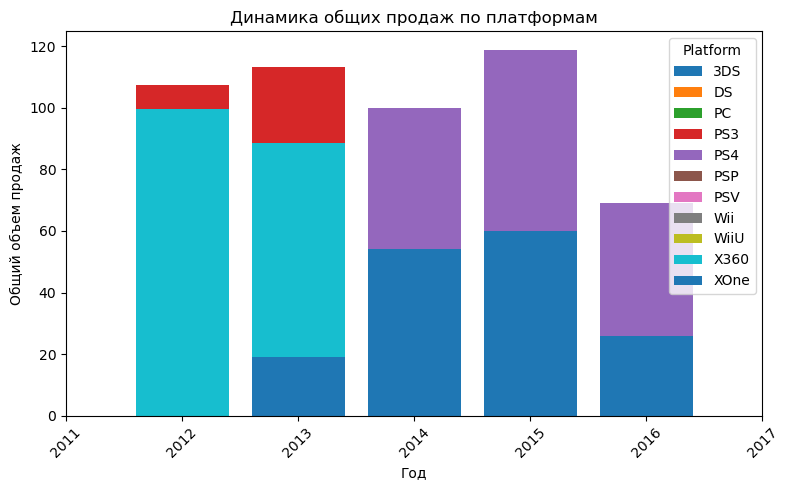

In [167]:
figure = plt.figure(figsize=(8, 5))
ax1 = figure.add_subplot()
ax1.bar(x=ax.loc[ax['platform']=='3DS','year_of_release'], height=ax.loc[ax['platform']=='3DS', 'total_sales'], label='3DS')
ax1.bar(x=ax.loc[ax['platform']=='DS','year_of_release'], height=ax.loc[ax['platform']=='DS', 'total_sales'], label='DS')
ax1.bar(x=ax.loc[ax['platform']=='PC','year_of_release'], height=ax.loc[ax['platform']=='PC', 'total_sales'], label='PC')
ax1.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'total_sales'], label='PS3')
ax1.bar(x=ax.loc[ax['platform']=='PS4','year_of_release'], height=ax.loc[ax['platform']=='PS4', 'total_sales'], label='PS4')
ax1.bar(x=ax.loc[ax['platform']=='PSP','year_of_release'], height=ax.loc[ax['platform']=='PSP', 'total_sales'], label='PSP')
ax1.bar(x=ax.loc[ax['platform']=='PSV','year_of_release'], height=ax.loc[ax['platform']=='PSV', 'total_sales'], label='PSV')
ax1.bar(x=ax.loc[ax['platform']=='Wii','year_of_release'], height=ax.loc[ax['platform']=='Wii', 'total_sales'], label='Wii')
ax1.bar(x=ax.loc[ax['platform']=='WiiU','year_of_release'], height=ax.loc[ax['platform']=='WiiU', 'total_sales'], label='WiiU')
ax1.bar(x=ax.loc[ax['platform']=='X360','year_of_release'], height=ax.loc[ax['platform']=='X360', 'total_sales'], label='X360')
ax1.bar(x=ax.loc[ax['platform']=='XOne','year_of_release'], height=ax.loc[ax['platform']=='XOne', 'total_sales'], label='XOne')


ax1.legend(title='Platform')
plt.title('Динамика общих продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Общий объем продаж')
plt.xticks(rotation=45)
plt.xlim(2011,2017)
plt.tight_layout()

Рассмотрим динамику продаж в каждом из географических регионов по отдельности в Северное Америке, Европе и Японии

In [168]:
ax[ax['year_of_release']==2016].sort_values(by=['year_of_release', 'na_sales'], ascending=[True,False])

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
20,PS4,2016,21.40,31.78,5.74,10.23,69.15
47,XOne,2016,14.09,9.50,0.01,2.22,25.82
4,3DS,2016,4.13,2.31,8.02,0.64,15.10
38,WiiU,2016,1.98,1.33,0.67,0.32,4.30
11,PC,2016,1.36,3.50,0.00,0.36,5.22
16,PS3,2016,0.57,1.01,1.28,0.30,3.16
43,X360,2016,0.56,0.56,0.00,0.10,1.22
29,PSV,2016,0.15,0.38,3.56,0.15,4.24


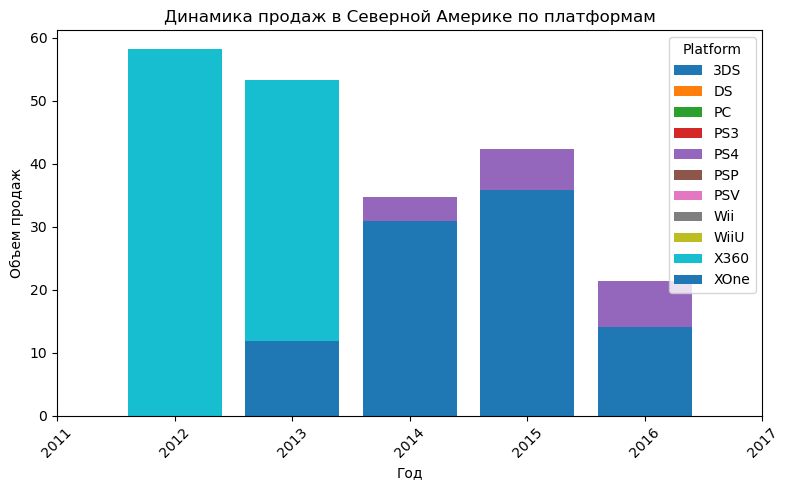

In [169]:
figure = plt.figure(figsize=(8, 5))
ax1 = figure.add_subplot()
ax1.bar(x=ax.loc[ax['platform']=='3DS','year_of_release'], height=ax.loc[ax['platform']=='3DS', 'na_sales'], label='3DS')
ax1.bar(x=ax.loc[ax['platform']=='DS','year_of_release'], height=ax.loc[ax['platform']=='DS', 'na_sales'], label='DS')
ax1.bar(x=ax.loc[ax['platform']=='PC','year_of_release'], height=ax.loc[ax['platform']=='PC', 'na_sales'], label='PC')
ax1.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'na_sales'], label='PS3')
ax1.bar(x=ax.loc[ax['platform']=='PS4','year_of_release'], height=ax.loc[ax['platform']=='PS4', 'na_sales'], label='PS4')
ax1.bar(x=ax.loc[ax['platform']=='PSP','year_of_release'], height=ax.loc[ax['platform']=='PSP', 'na_sales'], label='PSP')
ax1.bar(x=ax.loc[ax['platform']=='PSV','year_of_release'], height=ax.loc[ax['platform']=='PSV', 'na_sales'], label='PSV')
ax1.bar(x=ax.loc[ax['platform']=='Wii','year_of_release'], height=ax.loc[ax['platform']=='Wii', 'na_sales'], label='Wii')
ax1.bar(x=ax.loc[ax['platform']=='WiiU','year_of_release'], height=ax.loc[ax['platform']=='WiiU', 'na_sales'], label='WiiU')
ax1.bar(x=ax.loc[ax['platform']=='X360','year_of_release'], height=ax.loc[ax['platform']=='X360', 'na_sales'], label='X360')
ax1.bar(x=ax.loc[ax['platform']=='XOne','year_of_release'], height=ax.loc[ax['platform']=='XOne', 'na_sales'], label='XOne')


ax1.legend(title='Platform')
plt.title('Динамика продаж в Северной Америке по платформам')
plt.xlabel('Год')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.xlim(2011,2017)
plt.tight_layout()

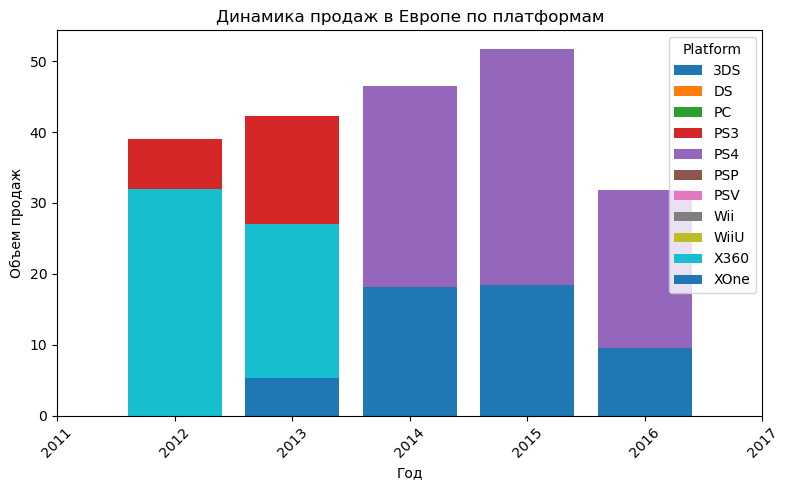

In [170]:
figure = plt.figure(figsize=(8, 5))
ax1 = figure.add_subplot()
ax1.bar(x=ax.loc[ax['platform']=='3DS','year_of_release'], height=ax.loc[ax['platform']=='3DS', 'eu_sales'], label='3DS')
ax1.bar(x=ax.loc[ax['platform']=='DS','year_of_release'], height=ax.loc[ax['platform']=='DS', 'eu_sales'], label='DS')
ax1.bar(x=ax.loc[ax['platform']=='PC','year_of_release'], height=ax.loc[ax['platform']=='PC', 'eu_sales'], label='PC')
ax1.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'eu_sales'], label='PS3')
ax1.bar(x=ax.loc[ax['platform']=='PS4','year_of_release'], height=ax.loc[ax['platform']=='PS4', 'eu_sales'], label='PS4')
ax1.bar(x=ax.loc[ax['platform']=='PSP','year_of_release'], height=ax.loc[ax['platform']=='PSP', 'eu_sales'], label='PSP')
ax1.bar(x=ax.loc[ax['platform']=='PSV','year_of_release'], height=ax.loc[ax['platform']=='PSV', 'eu_sales'], label='PSV')
ax1.bar(x=ax.loc[ax['platform']=='Wii','year_of_release'], height=ax.loc[ax['platform']=='Wii', 'eu_sales'], label='Wii')
ax1.bar(x=ax.loc[ax['platform']=='WiiU','year_of_release'], height=ax.loc[ax['platform']=='WiiU', 'eu_sales'], label='WiiU')
ax1.bar(x=ax.loc[ax['platform']=='X360','year_of_release'], height=ax.loc[ax['platform']=='X360', 'eu_sales'], label='X360')
ax1.bar(x=ax.loc[ax['platform']=='XOne','year_of_release'], height=ax.loc[ax['platform']=='XOne', 'eu_sales'], label='XOne')


ax1.legend(title='Platform')
plt.title('Динамика продаж в Европе по платформам')
plt.xlabel('Год')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.xlim(2011,2017)
plt.tight_layout()

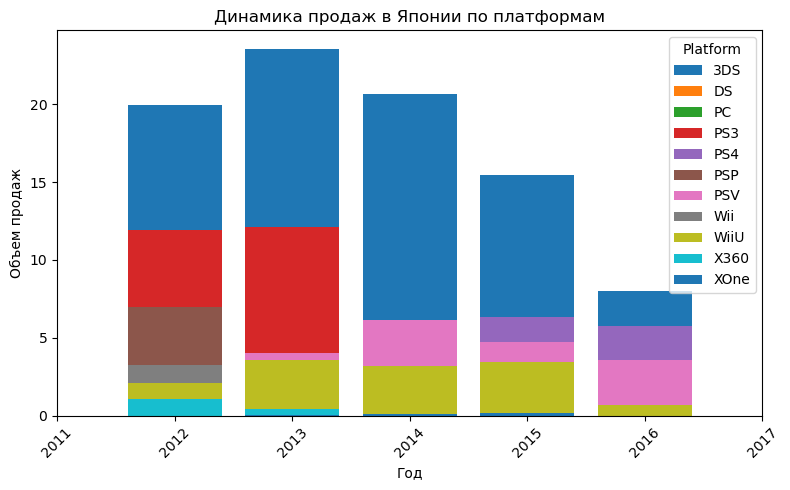

In [171]:
figure = plt.figure(figsize=(8, 5))
ax1 = figure.add_subplot()
ax1.bar(x=ax.loc[ax['platform']=='3DS','year_of_release'], height=ax.loc[ax['platform']=='3DS', 'jp_sales'], label='3DS')
ax1.bar(x=ax.loc[ax['platform']=='DS','year_of_release'], height=ax.loc[ax['platform']=='DS', 'jp_sales'], label='DS')
ax1.bar(x=ax.loc[ax['platform']=='PC','year_of_release'], height=ax.loc[ax['platform']=='PC', 'jp_sales'], label='PC')
ax1.bar(x=ax.loc[ax['platform']=='PS3','year_of_release'], height=ax.loc[ax['platform']=='PS3', 'jp_sales'], label='PS3')
ax1.bar(x=ax.loc[ax['platform']=='PS4','year_of_release'], height=ax.loc[ax['platform']=='PS4', 'jp_sales'], label='PS4')
ax1.bar(x=ax.loc[ax['platform']=='PSP','year_of_release'], height=ax.loc[ax['platform']=='PSP', 'jp_sales'], label='PSP')
ax1.bar(x=ax.loc[ax['platform']=='PSV','year_of_release'], height=ax.loc[ax['platform']=='PSV', 'jp_sales'], label='PSV')
ax1.bar(x=ax.loc[ax['platform']=='Wii','year_of_release'], height=ax.loc[ax['platform']=='Wii', 'jp_sales'], label='Wii')
ax1.bar(x=ax.loc[ax['platform']=='WiiU','year_of_release'], height=ax.loc[ax['platform']=='WiiU', 'jp_sales'], label='WiiU')
ax1.bar(x=ax.loc[ax['platform']=='X360','year_of_release'], height=ax.loc[ax['platform']=='X360', 'jp_sales'], label='X360')
ax1.bar(x=ax.loc[ax['platform']=='XOne','year_of_release'], height=ax.loc[ax['platform']=='XOne', 'jp_sales'], label='XOne')


ax1.legend(title='Platform')
plt.title('Динамика продаж в Японии по платформам')
plt.xlabel('Год')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.xlim(2011,2017)
plt.tight_layout()

***
**Вывод**

*Общие продажи*
- Наиболее прибыльнами платформами за проанализаированный **период с 2012-2016** являются платформы **XOne** и **PS4**
- Продажи на платформах PS3 и X360 наоборот падают
- Популярность платформ зависит от географии

*Продажи в разрезе регионов*
- В **Северной Америке** и **Европе** наиболее **популярные** платформы **XOne** и **PS4**
- В **Северной Америке** за период с 2012 по 2016 **утратила популярность** платформа **X360**
- В **Европе** за период с 2012 по 2016 **утратили популярность** платформы **X360** и **PS3**
- В **Японии** **наибольшаа дифференциация** продаж по платформам
- В **Японии** в последние годы **наиболее актуальные** платформы **PS4**, **PSV**, **WiiU**
- В **Японии** за период с 2012 по 2016 **утратили популярность** платформы **X360**, **PS3**

*Выбор прибыльных платформ*
- В общем (без разделения по регионам) наиболее популярными платформами за анализируемый период являются **XOne** и **PS4**
- В Северной Америке и Европе - **XOne** и **PS4**
- В Японии - **PS4**, **PSV**, **WiiU**
***

### Изучение распределения общих продаж по платформам

In [172]:
ax.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2013.937500,12.223958,10.446250,3.994583,3.233125,29.897917
std,1.374637,15.019481,13.121006,5.761753,4.800908,33.415715
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.120000
25%,2013.000000,1.825000,1.945000,0.042500,0.350000,6.977500
50%,2014.000000,6.345000,5.440000,2.290000,1.395000,16.285000
75%,2015.000000,15.682500,11.747500,4.990000,2.867500,44.152500
max,2016.000000,58.260000,51.760000,23.570000,18.450000,118.860000


(0.0, 3.0)

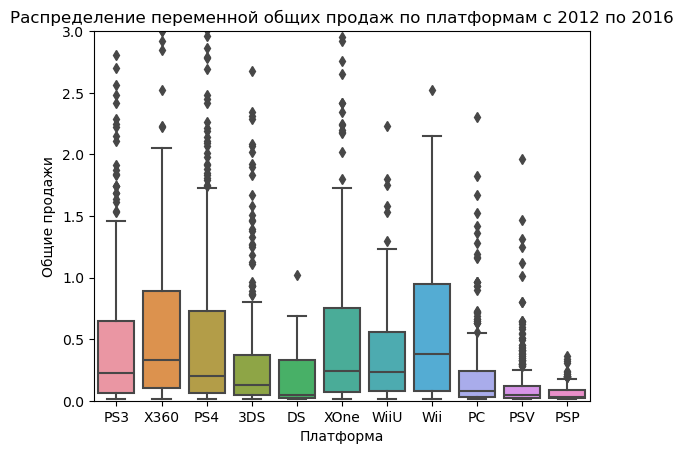

In [173]:
sns.boxplot(x='platform', y='total_sales', data=data)
plt.title('Распределение переменной общих продаж по платформам с 2012 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.ylim(0,3)

***
**Вывод о распределении общих продаж по платформам за период 2012-2016**
- Для всех платформ характерны выбросы по продажам
- Исходя из данных медианных значений и значениий 3-го квартиля наиболее прибыльными платформами являются: Wii, X360, XOne
- Наименее прибыльными платформами являются PSP, DS, PSV
- Для продаж по всем платформам характерны выбросы 
***

### Платформа PS4: изучение зависимости продаж и оценок

In [174]:
ps4 = data.loc[data['platform']=='PS4',]

In [175]:
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,missing,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [176]:
ps4['total_sales']=ps4['na_sales']+ps4['eu_sales']+ps4['jp_sales']+ps4['other_sales']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2808\2018933963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['total_sales']=ps4['na_sales']+ps4['eu_sales']+ps4['jp_sales']+ps4['other_sales']


In [177]:
ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,386.000000,386.000000,386.000000,386.000000,386.000000,250.00000,386.000000
mean,2015.134715,0.281399,0.365518,0.041347,0.125207,72.10800,0.813472
std,0.869385,0.587362,0.815881,0.069449,0.256358,12.53174,1.618992
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.00000,0.010000
25%,2015.000000,0.000000,0.010000,0.000000,0.010000,66.00000,0.060000
50%,2015.000000,0.060000,0.080000,0.020000,0.030000,73.50000,0.200000
75%,2016.000000,0.267500,0.307500,0.050000,0.117500,80.00000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.00000,14.630000


Text(0, 0.5, 'Оценка критиков')

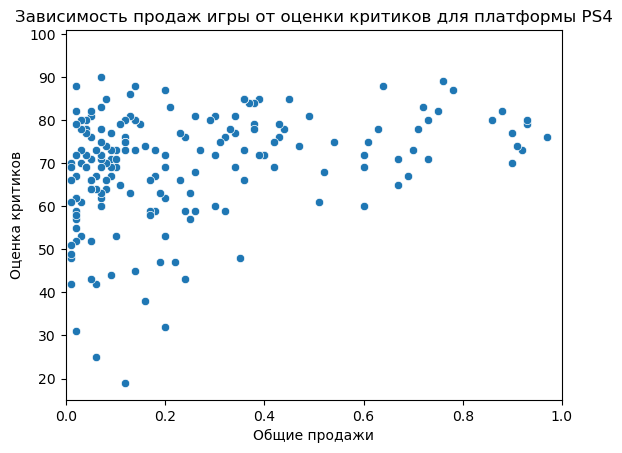

In [178]:
sns.scatterplot(data=ps4, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков для платформы PS4')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

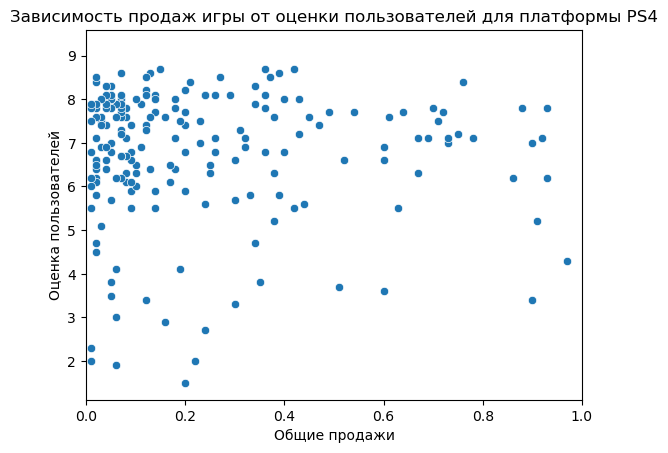

In [179]:
sns.scatterplot(data=ps4, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей для платформы PS4')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [180]:
ps4[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.784706,0.470920,0.944086,0.414918,-0.020933,0.927934
eu_sales,0.784706,1.000000,0.462449,0.944525,0.346515,-0.048925,0.958028
jp_sales,0.470920,0.462449,1.000000,0.494335,0.322120,0.171332,0.525067
other_sales,0.944086,0.944525,0.494335,1.000000,0.409061,-0.035639,0.998046
critic_score,0.414918,0.346515,0.322120,0.409061,1.000000,0.557654,0.406469
user_score,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,0.927934,0.958028,0.525067,0.998046,0.406469,-0.031957,1.000000


***
**Вывод о зависимости продаж на платформа SP4 от оценок критиков и пользователей**
- существует слабая прямая зависимость продаж игры от оценки критиков (чем больше оценка, тем больше продажи игры)
- связь между продажами игры и оценками пользователей отсутсвует (очень слабая)
- средняя прямая зависимость оценок пользователей и критиков (чем больше оценка критиков, тем больше оценка пользователей)
- графики отражают, что зависимость продаж от оценок пользователей слабее, чем от оценок критиков (так как график более рассеянный)

***

### Изучение факторов, влияющих на продажи за период с 2012-2016

In [181]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [182]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [183]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,1299.000000,2753.000000
mean,2013.897930,0.213131,0.182136,0.069648,0.056371,72.361047,0.521286
std,1.407558,0.578702,0.516281,0.246918,0.168214,12.639352,1.275166
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,0.130000
75%,2015.000000,0.180000,0.150000,0.060000,0.040000,81.000000,0.450000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,21.050000


Text(0, 0.5, 'Оценка критиков')

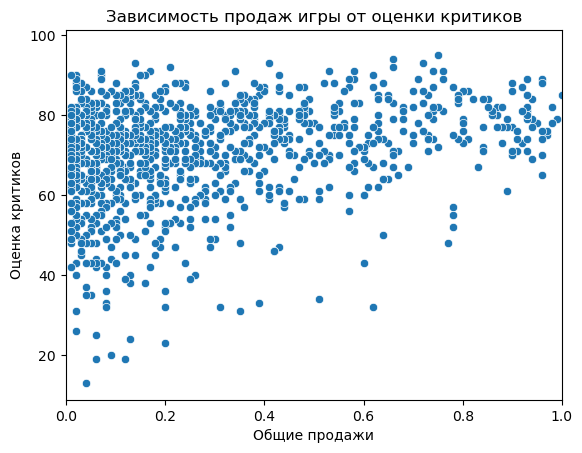

In [184]:
sns.scatterplot(data=data, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

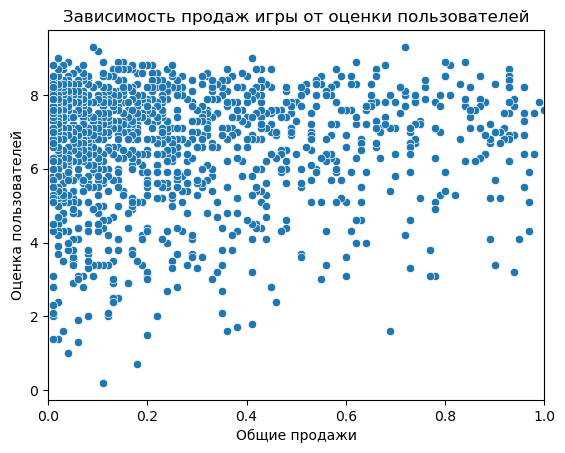

In [185]:
sns.scatterplot(data=data, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [186]:
data[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.766645,0.268548,0.791410,0.289309,-0.014446,0.920619
eu_sales,0.766645,1.000000,0.262972,0.936791,0.282599,-0.022248,0.927294
jp_sales,0.268548,0.262972,1.000000,0.200410,0.115463,0.163880,0.448418
other_sales,0.791410,0.936791,0.200410,1.000000,0.271736,-0.011111,0.909166
critic_score,0.289309,0.282599,0.115463,0.271736,1.000000,0.518573,0.307298
user_score,-0.014446,-0.022248,0.163880,-0.011111,0.518573,1.000000,0.004194
total_sales,0.920619,0.927294,0.448418,0.909166,0.307298,0.004194,1.000000


### Платформа PS3: изучение зависимости продаж и оценок

In [187]:
ps3 = data.loc[data['platform']=='PS3',]

In [188]:
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


In [189]:
ps3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,466.000000,466.000000,466.000000,466.000000,466.000000,212.000000,466.000000
mean,2013.384120,0.221245,0.228004,0.074936,0.092511,71.669811,0.616695
std,1.239357,0.540808,0.684091,0.125914,0.272962,13.191425,1.498869
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.060000
50%,2013.000000,0.050000,0.030000,0.030000,0.020000,74.000000,0.225000
75%,2014.000000,0.257500,0.210000,0.090000,0.090000,81.000000,0.647500
max,2016.000000,7.020000,9.090000,0.980000,3.960000,97.000000,21.050000


Text(0, 0.5, 'Оценка критиков')

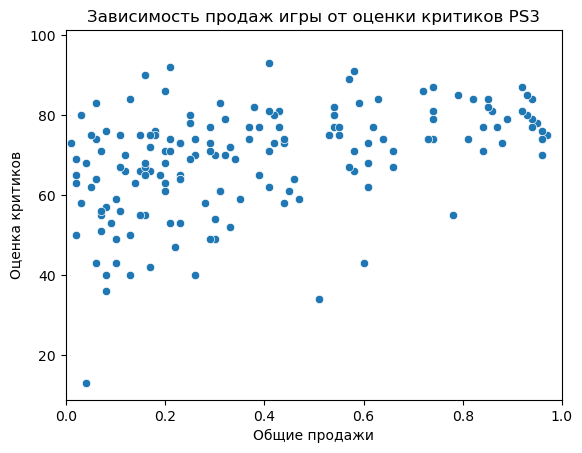

In [190]:
sns.scatterplot(data=ps3, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков PS3')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

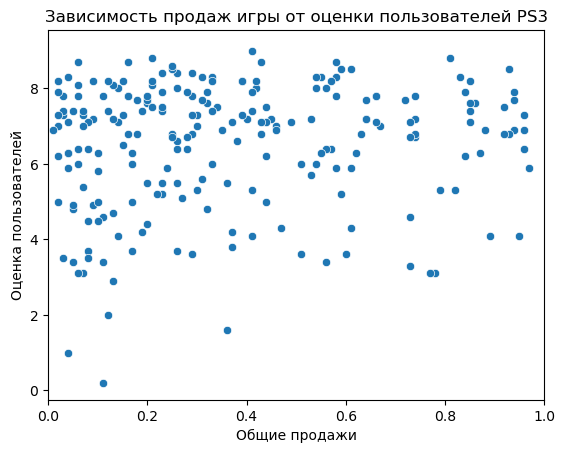

In [191]:
sns.scatterplot(data=ps3, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей PS3')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [192]:
ps3[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.841917,0.365135,0.895608,0.342467,-0.021661,0.938840
eu_sales,0.841917,1.000000,0.379128,0.981686,0.308282,-0.026407,0.970803
jp_sales,0.365135,0.379128,1.000000,0.389229,0.172049,0.179984,0.459670
other_sales,0.895608,0.981686,0.389229,1.000000,0.315220,-0.005069,0.986001
critic_score,0.342467,0.308282,0.172049,0.315220,1.000000,0.544510,0.333726
user_score,-0.021661,-0.026407,0.179984,-0.005069,0.544510,1.000000,-0.006206
total_sales,0.938840,0.970803,0.459670,0.986001,0.333726,-0.006206,1.000000


### Платформа X360: изучение зависимости продаж и оценок

In [193]:
x360 = data.loc[data['platform']=='X360',]

In [194]:
x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,missing,9.18


In [195]:
x360.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,281.000000,281.000000,281.000000,281.000000,281.000000,171.000000,281.000000
mean,2013.163701,0.495231,0.263416,0.005552,0.072100,70.871345,0.836299
std,1.137776,1.072492,0.573720,0.012062,0.149313,14.193861,1.739459
min,2012.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.010000
25%,2012.000000,0.060000,0.030000,0.000000,0.010000,63.500000,0.100000
50%,2013.000000,0.180000,0.110000,0.000000,0.030000,74.000000,0.330000
75%,2014.000000,0.510000,0.260000,0.010000,0.080000,81.000000,0.890000
max,2016.000000,9.660000,5.140000,0.070000,1.410000,97.000000,16.270000


Text(0, 0.5, 'Оценка критиков')

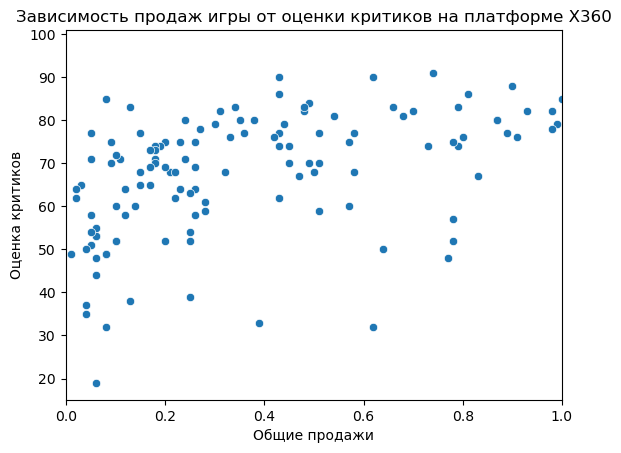

In [196]:
sns.scatterplot(data=x360, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков на платформе X360')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

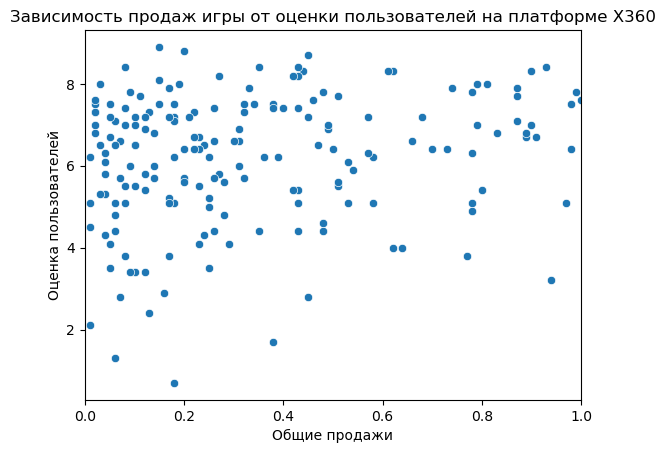

In [197]:
sns.scatterplot(data=x360, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей на платформе X360')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [198]:
x360[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.837466,0.523053,0.964808,0.342341,-0.000710,0.979230
eu_sales,0.837466,1.000000,0.524627,0.942880,0.354643,0.017297,0.930754
jp_sales,0.523053,0.524627,1.000000,0.538621,0.233093,0.095023,0.548702
other_sales,0.964808,0.942880,0.538621,1.000000,0.362118,0.001865,0.995429
critic_score,0.342341,0.354643,0.233093,0.362118,1.000000,0.557352,0.360573
user_score,-0.000710,0.017297,0.095023,0.001865,0.557352,1.000000,0.006164
total_sales,0.979230,0.930754,0.548702,0.995429,0.360573,0.006164,1.000000


### Платформа XOne: изучение зависимости продаж и оценок

In [199]:
xone = data.loc[data['platform']=='XOne',]

In [200]:
xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,missing,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [201]:
xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,236.000000,236.000000,236.000000,236.000000,236.000000,166.000000,236.000000
mean,2014.915254,0.393093,0.217924,0.001441,0.060297,73.566265,0.672754
std,0.954954,0.640645,0.371236,0.005263,0.095647,12.862153,1.051848
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.010000
25%,2014.000000,0.040000,0.020000,0.000000,0.010000,67.000000,0.067500
50%,2015.000000,0.140000,0.070000,0.000000,0.020000,76.000000,0.240000
75%,2016.000000,0.410000,0.230000,0.000000,0.070000,82.750000,0.750000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,7.390000


Text(0, 0.5, 'Оценка критиков')

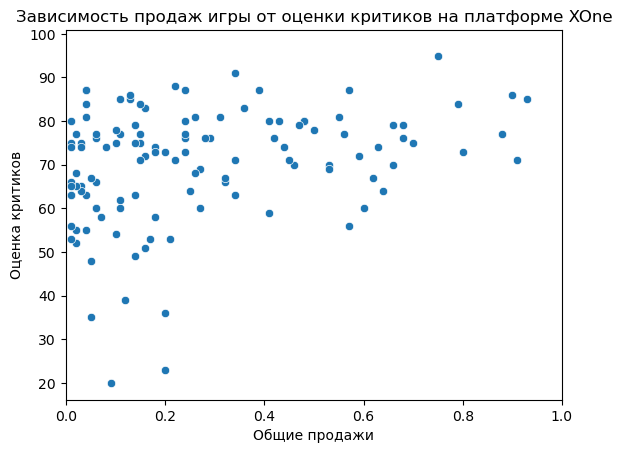

In [202]:
sns.scatterplot(data=xone, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков на платформе XOne')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

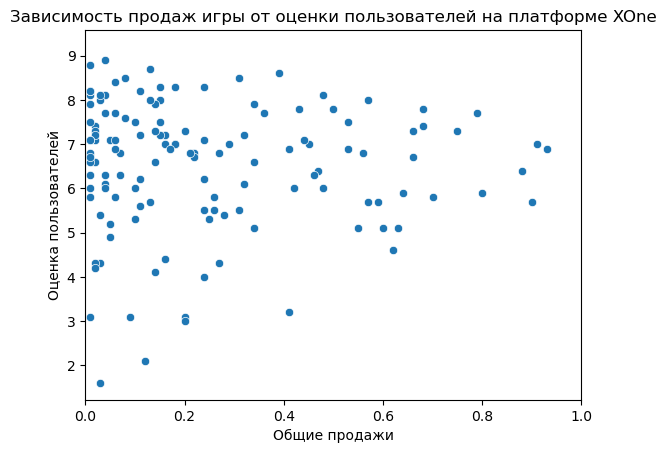

In [203]:
sns.scatterplot(data=xone, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей на платформе XOne')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [204]:
xone[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.762180,0.422572,0.987946,0.383670,-0.069318,0.970019
eu_sales,0.762180,1.000000,0.417934,0.850906,0.374916,-0.055911,0.896621
jp_sales,0.422572,0.417934,1.000000,0.438689,0.200851,0.069591,0.449774
other_sales,0.987946,0.850906,0.438689,1.000000,0.406786,-0.069645,0.995168
critic_score,0.383670,0.374916,0.200851,0.406786,1.000000,0.472462,0.412156
user_score,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
total_sales,0.970019,0.896621,0.449774,0.995168,0.412156,-0.068925,1.000000


### Платформа 3DS изучение зависимости продаж и оценок

In [205]:
ds3 = data.loc[data['platform']=='3DS',]

In [206]:
ds3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,missing,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,missing,7.55


In [207]:
ds3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,367.000000,367.000000,367.000000,367.000000,367.000000,100.000000,367.000000
mean,2013.722071,0.148910,0.113460,0.238910,0.023815,70.420000,0.525095
std,1.346571,0.508923,0.403605,0.576295,0.081523,11.758668,1.435539
min,2012.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.020000,0.000000,64.000000,0.050000
50%,2014.000000,0.000000,0.000000,0.070000,0.000000,71.000000,0.130000
75%,2015.000000,0.100000,0.060000,0.180000,0.010000,78.250000,0.370000
max,2016.000000,5.280000,4.190000,4.390000,0.780000,92.000000,14.600000


Text(0, 0.5, 'Оценка критиков')

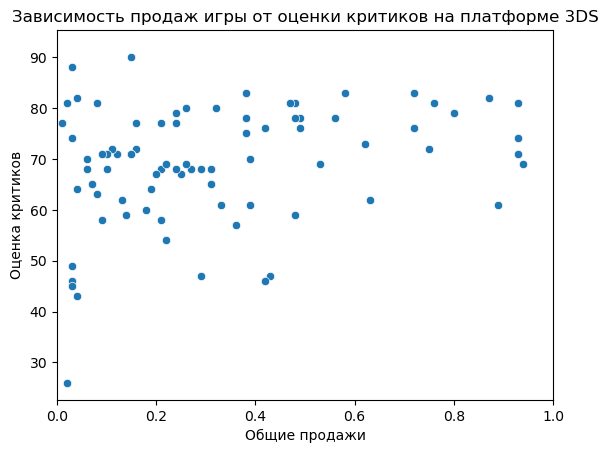

In [208]:
sns.scatterplot(data=ds3, x="total_sales", y="critic_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки критиков на платформе 3DS')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка критиков')

Text(0, 0.5, 'Оценка пользователей')

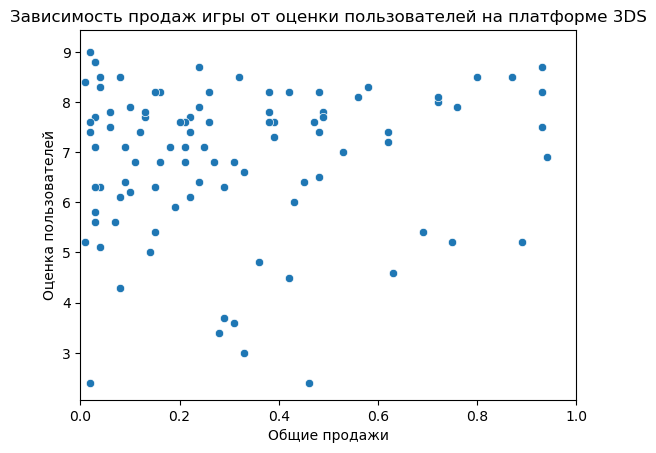

In [209]:
sns.scatterplot(data=ds3, x="total_sales", y="user_score")
plt.xlim(0,1)
plt.title('Зависимость продаж игры от оценки пользователей на платформе 3DS')
plt.xlabel('Общие продажи')
plt.ylabel('Оценка пользователей')

In [210]:
ds3[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.931674,0.664358,0.991176,0.316306,0.185631,0.939453
eu_sales,0.931674,1.000000,0.683880,0.964000,0.251750,0.118699,0.940734
jp_sales,0.664358,0.683880,1.000000,0.679556,0.299320,0.238252,0.867841
other_sales,0.991176,0.964000,0.679556,1.000000,0.298015,0.162372,0.952016
critic_score,0.316306,0.251750,0.299320,0.298015,1.000000,0.722762,0.310553
user_score,0.185631,0.118699,0.238252,0.162372,0.722762,1.000000,0.197583
total_sales,0.939453,0.940734,0.867841,0.952016,0.310553,0.197583,1.000000


***
**Вывод о зависимости продаж от оценок критиков и пользователей**
- существует слабая прямая зависимость продаж игры от оценки критиков (чем больше оценка, тем больше продажи игры)
- связь между продажами игры и оценками пользователей отсутсвует
- средняя прямая зависимость оценок пользователей и критиков (чем больше оценка критиков, тем больше оценка пользователей)
- графики и коэффициент корреляции отражают, что зависимость продаж от оценок пользователей слабее, чем от оценок критиков (так как график более рассеянный)
  
**Выводы в целом по данным за период с 2012 по 2016 совпадают с выводами о влиянии оценок критиков и пользователей на общие продажи по данным наиболее популярных платформ PS4, PS3, XOne, X360. Однако для менее популярных платформ (3DS), зависимость продаж от оценок пользователей выше, но все еще отражает слабую связь продаж и оценки пользователей** 
***

### Распределение игр по жанрам и зависимость продаж от жанра игры 

In [211]:
ax=data['genre'].value_counts().to_frame().reset_index()
ax

,genre,count
0,Action,983
1,Role-Playing,370
2,Adventure,289
3,Sports,248
4,Shooter,228
5,Misc,173
6,Racing,112
7,Fighting,106
8,Platform,78
9,Simulation,74


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

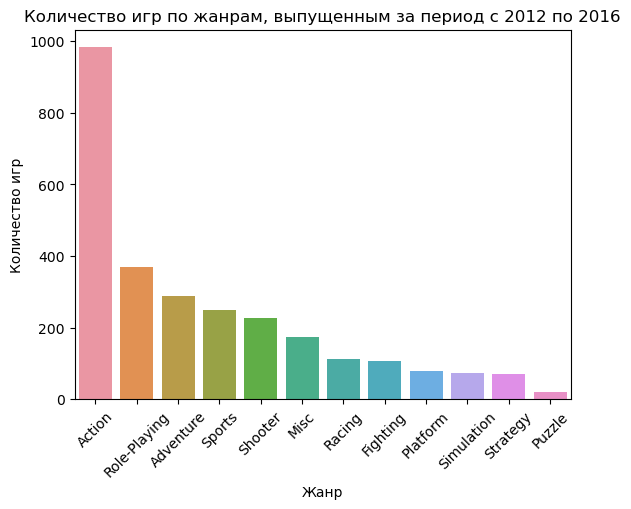

In [212]:
sns.barplot(x=ax['genre'], y=ax['count'])
plt.title('Количество игр по жанрам, выпущенным за период с 2012 по 2016')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)

In [213]:
ax=data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index().sort_values(by='total_sales', ascending=False)

(0.0, 5.0)

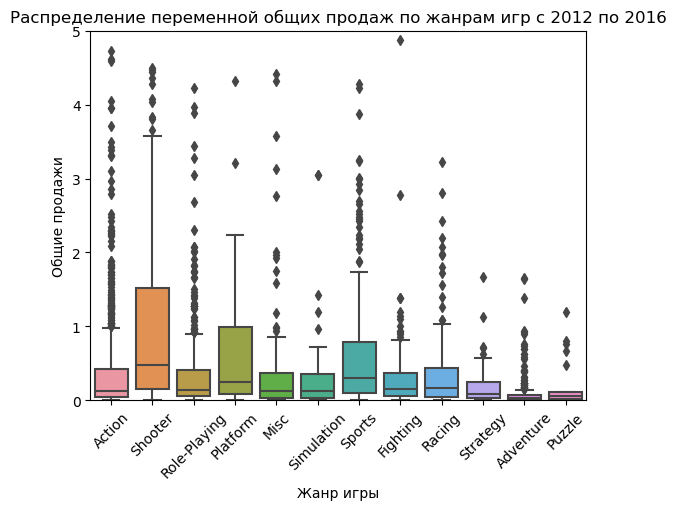

In [214]:
sns.boxplot(x='genre', y='total_sales', data=data)
plt.title('Распределение переменной общих продаж по жанрам игр с 2012 по 2016')
plt.xlabel('Жанр игры')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.ylim(0,5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

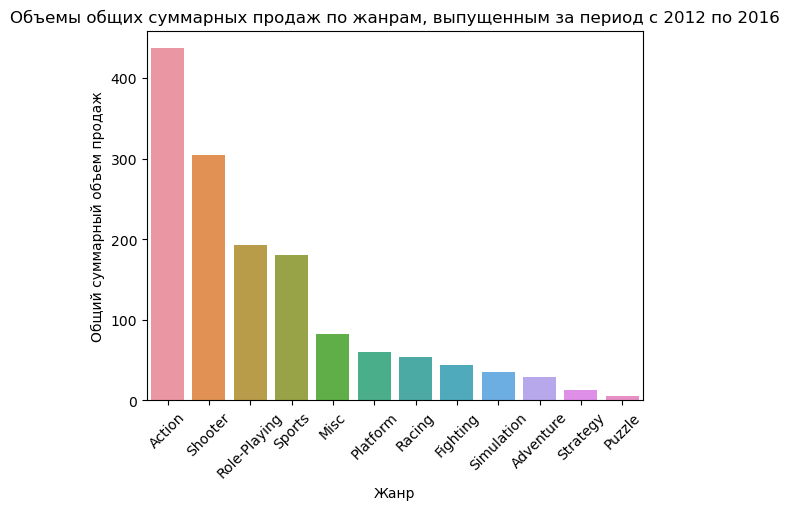

In [215]:
sns.barplot(x=ax['genre'], y=ax['total_sales'])
plt.title('Объемы общих суммарных продаж по жанрам, выпущенным за период с 2012 по 2016')
plt.xlabel('Жанр')
plt.ylabel('Общий суммарный объем продаж')
plt.xticks(rotation=45)

In [216]:
data['genre_code']= data['genre'].apply(lambda g: 
    1 if g == 'Action' else 
    2 if g == 'Role-Playing' else 
    3 if g == 'Adventure' else 
    4 if g == 'Sports' else 
    5 if g == 'Shooter' else 
    6 if g == 'Misc' else 
    7 if g == 'Racing' else 
    8 if g == 'Fighting' else 
    9 if g == 'Platform' else 
    10 if g == 'Simulation' else 
    11 if g == 'Strategy' else 
    12)

In [217]:
data[['na_sales',	'eu_sales',	'jp_sales',	'other_sales', 'total_sales', 'genre_code']].corr()

,na_sales,eu_sales,jp_sales,other_sales,total_sales,genre_code
na_sales,1.000000,0.766645,0.268548,0.791410,0.920619,0.029695
eu_sales,0.766645,1.000000,0.262972,0.936791,0.927294,0.037487
jp_sales,0.268548,0.262972,1.000000,0.200410,0.448418,0.003120
other_sales,0.791410,0.936791,0.200410,1.000000,0.909166,0.013700
total_sales,0.920619,0.927294,0.448418,0.909166,1.000000,0.031065
genre_code,0.029695,0.037487,0.003120,0.013700,0.031065,1.000000


***
**Вывод об объемах продаж по жанрам**
- **Больше всего** игр за период с 2012-2016 выпускалось в жанре **Action**
- **Меньше** всего игр за период с 2012-2016 выпускалось в жанре **Puzzle**
- **Топ5 наиболее прибыльных** игр: Shooter, Sports, Platform
- **Топ5 наименее прибыльных** игр:Adveture,  Puzzle, Strategy 
- **В среднем зависимости между количеством выпущенных игр и их прибыльностью нет**
***

## Портрет пользователя по регионам (Северная Америка, Европа, Япония)

### Северная Америка

In [218]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_code
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,1
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,1
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63,5
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60,2
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,5


In [219]:
ax=data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().T

In [220]:
ax['total_sales_region']=ax['E']+ax['E10+']+ax['M']+ax['T']+ax['missing']
ax['missing_share']=ax['missing']/ax['total_sales_region']*100
ax

rating,E,E10+,M,T,missing,total_sales_region,missing_share
na_sales,112.92,73.29,231.47,65.80,103.27,586.75,17.600341
eu_sales,110.94,52.48,193.94,52.82,91.24,501.42,18.196322
jp_sales,28.09,8.06,21.20,25.55,108.84,191.74,56.764368
other_sales,31.06,15.70,63.38,17.90,27.15,155.19,17.494684


In [221]:
ax_p = data.groupby('platform').agg(ratio_na=('na_sales', 'sum'), ratio_eu=('eu_sales', 'sum'), ratio_jp=('jp_sales', 'sum')).transform(lambda x: 100 * x / x.sum()).reset_index().sort_values(by='ratio_na', ascending=False)
ax_p

,platform,ratio_na,ratio_eu,ratio_jp
9,X360,23.717086,14.762076,0.813602
4,PS4,18.512143,28.138088,8.323772
3,PS3,17.571368,21.189821,18.212162
10,XOne,15.810822,10.256870,0.177323
0,3DS,9.314018,8.304415,45.728591
8,WiiU,6.459310,4.979857,6.785230
2,PC,3.258628,7.512664,0.000000
7,Wii,2.737111,2.036217,1.736727
6,PSV,1.869621,2.235651,10.915824
1,DS,0.741372,0.514539,1.940127


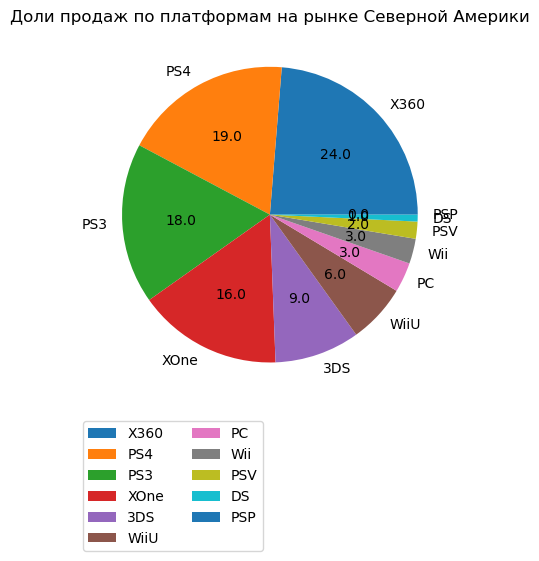

<Figure size 640x480 with 0 Axes>

In [222]:
plt.pie(ax_p['ratio_na'], labels=ax_p['platform'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по платформам на рынке Северной Америки")
plt.show()
plt.tight_layout()

In [223]:
ax_g = data.groupby('genre').agg(ratio_na=('na_sales', 'sum'), ratio_eu=('eu_sales', 'sum'), ratio_jp=('jp_sales', 'sum')).transform(lambda x: 100 * x / x.sum()).reset_index().sort_values(by='ratio_na', ascending=False)
ax_g

,genre,ratio_na,ratio_eu,ratio_jp
0,Action,30.062207,31.412788,27.292166
8,Shooter,24.651044,22.601811,4.808595
10,Sports,13.827013,13.697100,4.052363
7,Role-Playing,10.907542,9.678513,34.129550
3,Misc,6.288879,4.953931,6.706999
4,Platform,4.286323,4.170157,4.500887
2,Fighting,3.362591,2.147900,4.907687
6,Racing,2.919472,5.422600,1.288203
1,Adventure,1.472518,1.772965,4.297486
9,Simulation,1.320835,2.853895,5.397935


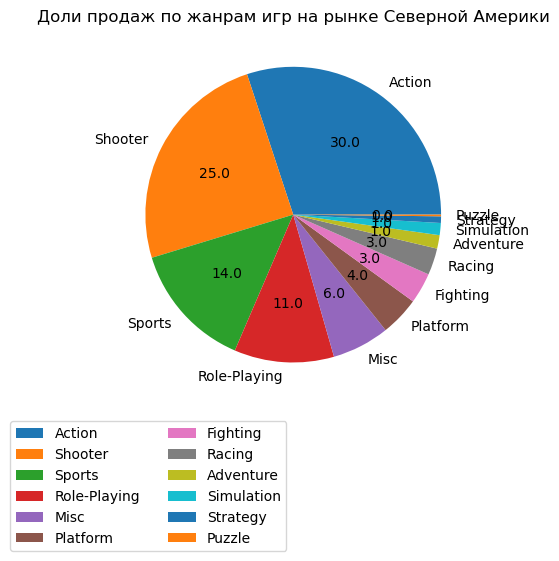

<Figure size 640x480 with 0 Axes>

In [224]:
plt.pie(ax_g['ratio_na'], labels=ax_g['genre'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по жанрам игр на рынке Северной Америки")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Объемы продаж')

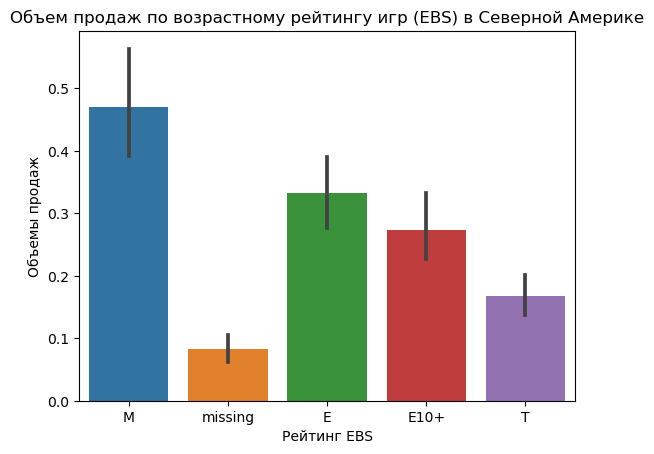

In [225]:
sns.barplot(x=data['rating'], y=data['na_sales'])
plt.title('Объем продаж по возрастному рейтингу игр (EBS) в Северной Америке')
plt.xlabel('Рейтинг EBS')
plt.ylabel('Объемы продаж')

***
**Портрет пользователя из Северной Америки**
- Наиболее популярные **платформы** среди пользователей Северной Америки: **X360(24%), PS4(19%), PS3(18%), XOne(16%)**
- Наиболее популярные **жанры игры** среди пользователей из Северной Америки: **Action(30%), Shooter(25%), Sports(14%), Role-Playing(11%)**
- Наиболее популярные игры рейтинга **M(для пользователей возрастом 17+) и E(для всех)**
***

### Европа

In [226]:
ax_p=ax_p.sort_values(by='ratio_eu', ascending=False)

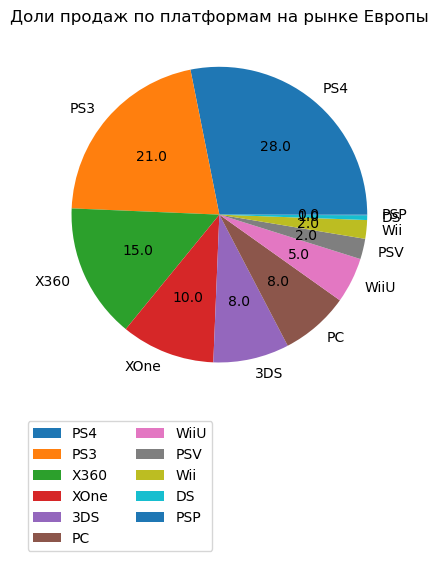

<Figure size 640x480 with 0 Axes>

In [227]:
plt.pie(ax_p['ratio_eu'], labels=ax_p['platform'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по платформам на рынке Европы")
plt.show()
plt.tight_layout()

In [228]:
ax_g = ax_g.sort_values(by='ratio_eu', ascending=False)

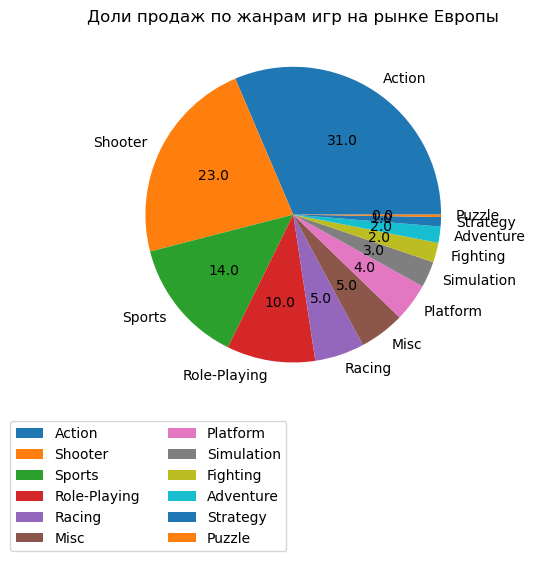

<Figure size 640x480 with 0 Axes>

In [229]:
plt.pie(ax_g['ratio_eu'], labels=ax_g['genre'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по жанрам игр на рынке Европы")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Объемы продаж')

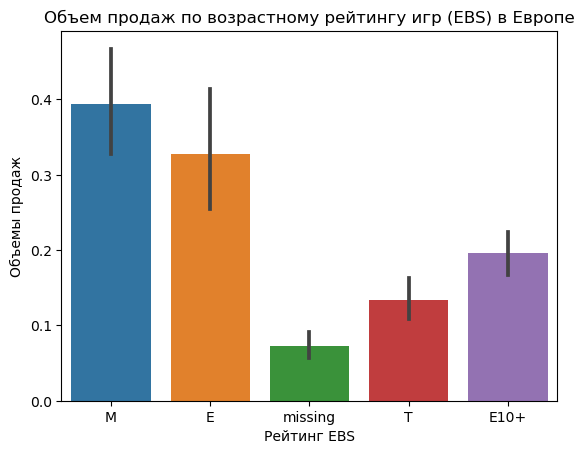

In [230]:
data_r = data.sort_values(by='eu_sales', ascending=False)
sns.barplot(x=data_r['rating'], y=data_r['eu_sales'])
plt.title('Объем продаж по возрастному рейтингу игр (EBS) в Европе')
plt.xlabel('Рейтинг EBS')
plt.ylabel('Объемы продаж')

***
**Портрет пользователя из Европы**
- Наиболее популярные **платформы** среди пользователей Европы: **PS4(28%), PS3(21%), X360(15%), XOne(10%)**
- Наиболее популярные **жанры игры** среди пользователей из Европы: **Action(31%), Shooter(24%), Sports(14%)**
- Наиболее популярные игры рейтинга **M(для пользователей возрастом 17+) и E(для всех)**
***

### Япония

In [231]:
ax_p=ax_p.sort_values(by='ratio_jp', ascending=False)

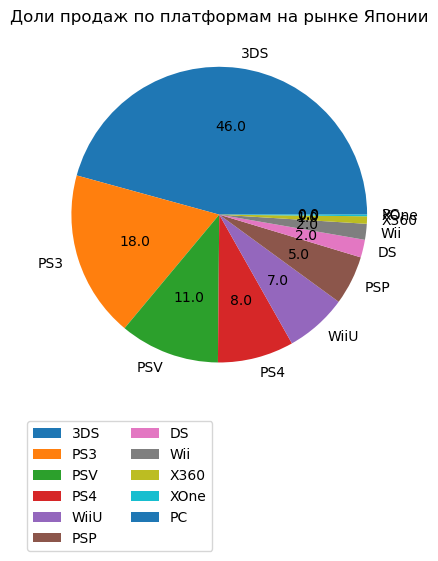

<Figure size 640x480 with 0 Axes>

In [232]:
plt.pie(ax_p['ratio_jp'], labels=ax_p['platform'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по платформам на рынке Японии")
plt.show()
plt.tight_layout()

In [233]:
ax_g = ax_g.sort_values(by='ratio_jp', ascending=False)

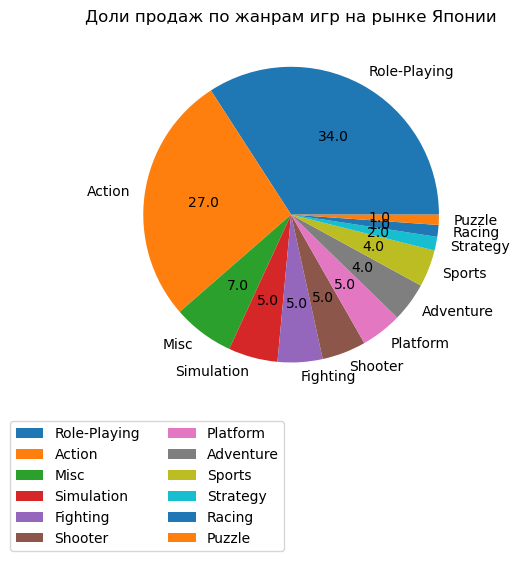

<Figure size 640x480 with 0 Axes>

In [234]:
plt.pie(ax_g['ratio_jp'], labels=ax_g['genre'], autopct=lambda pct: pct.round(0))
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.title("Доли продаж по жанрам игр на рынке Японии")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Объемы продаж')

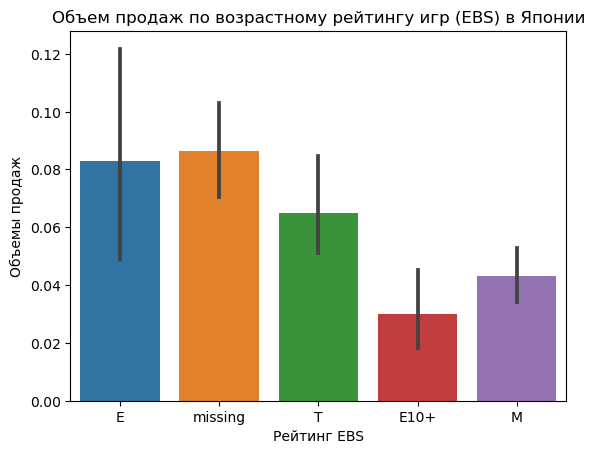

In [235]:
data_r = data_r.sort_values(by='jp_sales', ascending=False)
sns.barplot(x=data_r['rating'], y=data_r['jp_sales'])
plt.title('Объем продаж по возрастному рейтингу игр (EBS) в Японии')
plt.xlabel('Рейтинг EBS')
plt.ylabel('Объемы продаж')

***
**Портрет пользователя из Японии**
- Наиболее популярные **платформы** среди пользователей Европы: **3DS(46%), PS3(18%), PSV(11%)**
- Наиболее популярные **жанры игры** среди пользователей из Европы: **Role-Playing(34%), Action(27%)**
- Наиболее популярны игры с рейтингом **E(для всех) и T(подростки)**
***

**Общий вывод о портретах пользователей по регионам**
- Портреты пользователей **Северной Америки и Европы** очень **схожи** в особенности в разрезе жанров популярных игр:
    * Наиболее популярные платформы **PS4, PS3, X360**
    * Наиболее популярыне жанры игр **Action, Shooter, Sports**
    * Наиболее популярные игры рейтинга **M(для пользователей возрастом 17+) и E(для всех)**
    * На этих рынках аудитория относительно **взрослая 17+**
- Портрет пользователей из **Японии уникальный** как в разрезе популярных платформ, так и жанров игр:
    - Наиболее популярные **платформы** среди пользователей Европы: **3DS(46%), PS3(18%), PSV(11%)**
    - Наиболее популярные **жанры игры** среди пользователей из Европы: **Role-Playing(34%), Action(27%)**
    - Наиболее популярны игры с рейтингом **E(для всех) и T(подростки)**
    * На японском рынке вероятно основные пользователи подрости, возрастом **от 13 лет**
***

## Проверка гипотез

### Пользовательские рейтинги платформ Xbox One и PC 

**H0: Средний пользовательский рейтинг на платформе Xbox One равен среднему пользовательскому рейтингу на платформе PC**

H1: Средний пользовательский рейтинг на платформе Xbox One не равен среднему пользовательскому рейтингу на платформе PC

Используется метод для проверки равенства средних значений двух независимых выборок

In [236]:
alpha = 0.05

In [237]:
data.loc[data['user_score'].notna()==True, 'user_score']=data.loc[data['user_score'].notna()==True, 'user_score'].astype(int)

In [238]:
xbox_one = data.loc[(data['platform']=='XOne')&(data['user_score'].notna()==True), 'user_score']
xbox_one=xbox_one.astype(int)

In [239]:
xbox_one.shape

(182,)

In [240]:
pc = data.loc[(data['platform']=='PC')&(data['user_score'].notna()==True), 'user_score']
pc=pc.sample(n=(xbox_one.shape[0]))
pc=pc.astype(int)

In [241]:
results = st.ttest_ind(xbox_one, pc)
print('p-значение:', results.pvalue)

p-значение: 0.25020180795277097


In [242]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние оценки пользователей на платформах Xbox One и PC неравны')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Средние оценки пользователей на платформах Xbox One и PC равны')

Нет оснований отвергнуть нулевую гипотезу. Средние оценки пользователей на платформах Xbox One и PC равны


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)

**H0: Средний пользовательский рейтинг жанров Action равен среднему пользовательскому рейтингу жанра Sports**

H1: Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports

Используется метод для проверки равенства средних значений двух независимых выборок

In [243]:
sports = data.loc[(data['genre']=='Sports')&(data['user_score'].notna()==True), 'user_score']
sports=sports.astype(int)

In [244]:
action = data.loc[(data['genre']=='Action')&(data['user_score'].notna()==True), 'user_score']
action=action.astype(int)
action=action.sample(n=sports.shape[0])

In [245]:
results = st.ttest_ind(action, sports)
print('p-значение', results.pvalue)

p-значение 3.243699774981275e-15


In [246]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.  Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Средний пользовательский рейтинг жанров Action равен среднему пользовательскому рейтингу жанра Sports')

Отвергаем нулевую гипотезу.  Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports


***
**Вывод**
- Средние оценки пользователей на платформах Xbox One и PC равны
- Средние оценки жанров игр Action и Sports разные
***

<div style="border:solid blue 2px; padding: 20px">

**Общий вывод**

1. **Загрузка и знакомство с данными:**
   - в переменных Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутсвуют пропуски:
    * в таких переменных, как Name, Year_of_Release, Genre и Rating пропуски заменить не получится, так как переменные качественные (так как это может исказить данные)
    * пропуски в количественных переменных Critic_Score, User_Score получится заменить на соответсвующие характеристики распределения (медиана или среднее)
   - некоректный тип данных у переменных:
    * Critic_Score float -> int
    * User_Score object -> float
   - В колонке User_Score наиболее популярное значение tbd (to be determined), что значит, что рейтинг еще не определен. Поэтому такие значения можно заменить на 0
   - всего в таблице 16 715 записей

2. **Предобработка данных:**
   - были заполнены пропуски в переменных critic_score и user_score медианным значением
   - были выявлены и удалены неявные дубликаты, теперь таблица содержит **14 068 записи**
   - также были выявлены и устранены неявные дубликаты, они были связанны с пропущенными значениями и заменены на значение 'missing'
  

3. **Исследовательский анализ данных:**
   - больше всего продаж в игр в Северной Америке
   - меньше всего объем продаж в Японии

   *Вывод по динамике продаж по платформам*
   - в период с 2001 по 2016 год платформы с наибольшим количеством продаж DS, PS2, PS3, Wii, X360
   - платформы появляются и исчезают в периоде 5 лет, следовательно наиболее **актуальный период для анализа с 2012-2016**

   *Общие продажи за период с 2012-2016*
   - Наиболее прибыльнами платформами являются платформы **XOne** и **PS4**
   - Продажи на платформах PS3 и X360 наоборот падают
   - Популярность платформ зависит от географии
   
   *Продажи в разрезе регионов, определение прибыльных платформ и жанров*
   - В **Северной Америке** и **Европе** наиболее **прибыльные** платформы **XOne** и **PS4**
   - В **Северной Америке** за период с 2012 по 2016 **наименее прибыльные** платформа **X360**
   - В **Европе** за период с 2012 по 2016 **наименее прибыльные** платформы **X360** и **PS3**
   - В **Японии** **наибольшаа дифференциация** продаж по платформам
   - В **Японии** в последние годы **наиболее прибыльные** платформы **XOne**, **PS4**, **PSV**, **WiiU**
   - В **Японии** за период с 2012 по 2016 **наименее прибыльные** платформы **X360**, **PS3**,**PSP**, **Wii**

   *Вывод о зависимости продаж на платформа SP4 от оценок критиков и пользователей*
   - существует слабая прямая зависимость продаж игры от оценки критиков (чем больше оценка, тем больше продажи игры)
   - связь между продажами игры и оценками пользователей отсутсвует
   - средняя прямая зависимость оценок пользователей и критиков (чем больше оценка критиков, тем больше оценка пользователей)
   - графики отражают, что зависимость продаж от оценок пользователей слабее, чем от оценок критиков (так как график более рассеянный)
    
  *Вывод о зависимости продаж от оценок критиков и пользователей*
   - существует слабая прямая зависимость продаж игры от оценки критиков (чем больше оценка, тем больше продажи игры)
   - связь между продажами игры и оценками пользователей отсутсвует
   - средняя прямая зависимость оценок пользователей и критиков (чем больше оценка критиков, тем больше оценка пользователей)
   - графики и коэффициент корреляции отражают, что зависимость продаж от оценок пользователей слабее, чем от оценок критиков (так как график более рассеянный)
  
  **Выводы в целом по данным за период с 2012 по 2016 совпадают с выводами о влиянии оценок критиков и пользователей на общие продажи по данным наиболее популярных платформ PS4, PS3, XOne, X360. Однако для менее популярных платформ (3DS), зависимость продаж от оценок пользователей выше, но все еще отражает слабую связь продаж и оценки пользователей** 

   *Вывод об объемах продаж по жанрам*
   **Вывод об объемах продаж по жанрам**
   - **Больше всего** игр за период с 2012-2016 выпускалось в жанре **Action**
   - **Меньше** всего игр за период с 2012-2016 выпускалось в жанре **Puzzle**
   - **Топ5 наиболее прибыльных** игр: Shooter, Sports, Platform
   - **Топ5 наименее прибыльных** игр:Adveture,  Puzzle, Strategy
   - **В среднем зависимости между количеством выпущенных игр и их прибыльностью нет**
   - В среднем зависимости между количеством выпущенных игр и их прибыльностью нет
   
5. **Портрет пользователей по регионам:**
   *Общий вывод о портретах пользователей по регионам*
   - Портреты пользователей **Северной Америки и Европы** очень **схожи** в особенности в разрезе жанров популярных игр:
    * Наиболее популярные платформы **PS4, PS3, X360**
    * Наиболее популярыне жанры игр **Action, Shooter, Sports**
    * Наиболее популярные игры рейтинга **M(для пользователей возрастом 17+) и E(для всех)**
    * На этих рынках аудитория относительно **взрослая 17+**
   - Портрет пользователей из **Японии уникальный** как в разрезе популярных платформ, так и жанров игр:
    - Наиболее популярные **платформы** среди пользователей Европы: **3DS(46%), PS3(18%), PSV(11%)**
    - Наиболее популярные **жанры игры** среди пользователей из Европы: **Role-Playing(34%), Action(27%)**
    - Наиболее популярны игры с рейтингом **E(для всех) и T(подростки)**
    * На японском рынке вероятно основные пользователи подрости, возрастом **от 13 лет**
6. Проверка гипотез:
   - Средние оценки пользователей на платформах Xbox One и PC равны
   - Средние оценки жанров игр Action и Sports разные

</div>